In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("mubawab_listings_clean.csv")

In [4]:
df.head()

,Type,Localisation,Price,Area,Rooms,Bedrooms,Bathrooms,Floor,Other_tags,Price_m2
0,Appartements,Casablanca Finance City,22000,219.0,4.0,3.0,3.0,11.0,"['Nouveau', ""Moins d'un an""]",100.456621
1,Appartements,Anfa,1230000,86.0,3.0,2.0,2.0,1.0,"['Bon état', '10-20 ans']",14302.325581
2,Appartements,La Gironde,900000,86.0,3.0,2.0,1.0,5.0,"['Bon état', '10-20 ans']",10465.116279
3,Appartements,Bourgogne Ouest,2400000,180.0,5.0,3.0,3.0,3.0,"['Bon état', '10-20 ans']",13333.333333
4,Appartements,Les princesses,1550000,120.0,5.0,3.0,2.0,5.0,"['Bon état', '5-10 ans']",12916.666667


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1172 entries, 0 to 1171
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Type          1172 non-null   object 
 1   Localisation  1172 non-null   object 
 2   Price         1172 non-null   int64  
 3   Area          1172 non-null   float64
 4   Rooms         1172 non-null   float64
 5   Bedrooms      1172 non-null   float64
 6   Bathrooms     1172 non-null   float64
 7   Floor         1172 non-null   float64
 8   Other_tags    1172 non-null   object 
 9   Price_m2      1172 non-null   float64
dtypes: float64(6), int64(1), object(3)
memory usage: 91.7+ KB


In [6]:
df.describe()

,Price,Area,Rooms,Bedrooms,Bathrooms,Floor,Price_m2
count,1.172000e+03,1172.000000,1172.000000,1172.000000,1172.000000,1172.000000,1172.000000
mean,4.954876e+06,315.569113,4.814846,3.029863,2.408703,2.277304,15680.069704
std,7.401288e+06,465.934356,2.298929,1.370656,1.208153,2.206828,7721.871615
min,1.600000e+03,32.000000,1.000000,1.000000,1.000000,0.000000,33.333333
25%,1.221922e+06,91.000000,3.000000,2.000000,2.000000,0.000000,11722.790948
50%,2.300000e+06,138.500000,4.000000,3.000000,2.000000,2.000000,15088.528010
75%,5.990000e+06,360.250000,6.000000,4.000000,3.000000,4.000000,18334.942085
max,7.140000e+07,5400.000000,16.000000,18.000000,10.000000,20.000000,110810.810811


In [7]:
df.columns

Index(['Type', 'Localisation', 'Price', 'Area', 'Rooms', 'Bedrooms',
       'Bathrooms', 'Floor', 'Other_tags', 'Price_m2'],
      dtype='object')

In [8]:
df.dtypes

Type             object
Localisation     object
Price             int64
Area            float64
Rooms           float64
Bedrooms        float64
Bathrooms       float64
Floor           float64
Other_tags       object
Price_m2        float64
dtype: object

In [10]:
df.isna().sum()

Type            0
Localisation    0
Price           0
Area            0
Rooms           0
Bedrooms        0
Bathrooms       0
Floor           0
Other_tags      0
Price_m2        0
dtype: int64

EDA

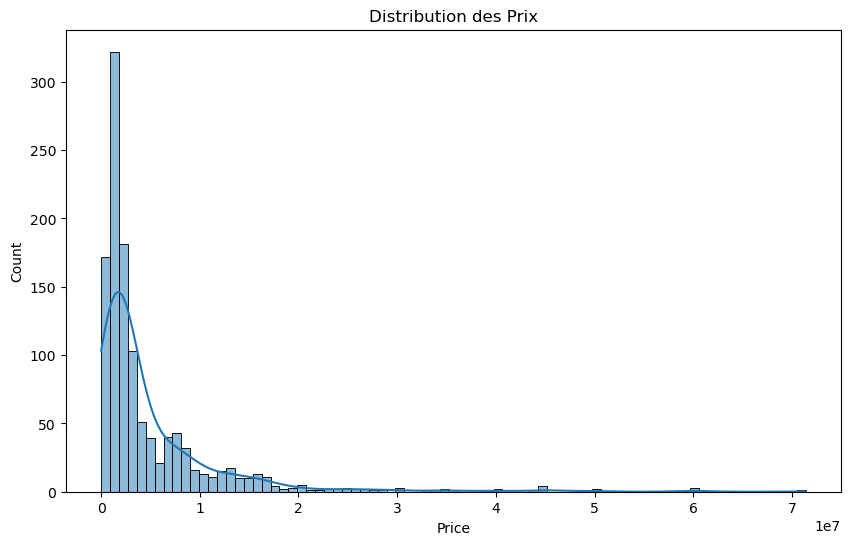

In [11]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Price'], kde=True)
plt.title('Distribution des Prix')
plt.show()

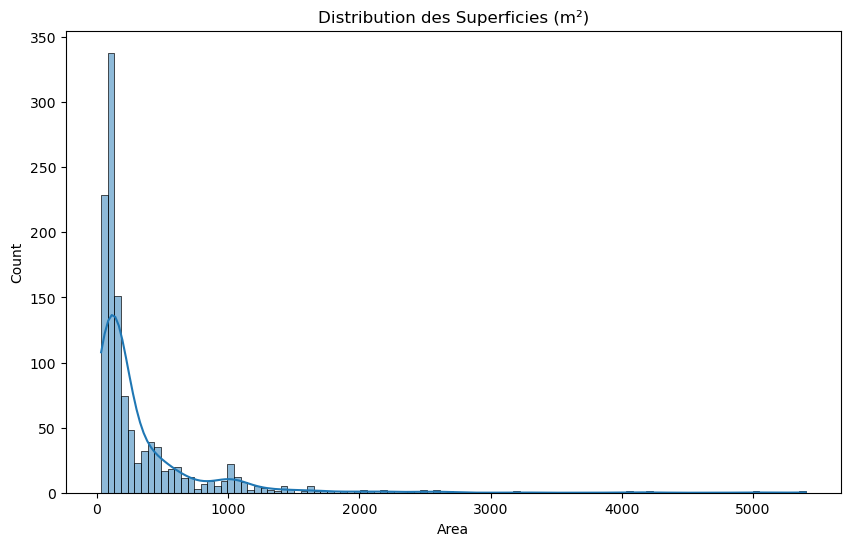

In [12]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Area'], kde=True)
plt.title('Distribution des Superficies (m²)')
plt.show()

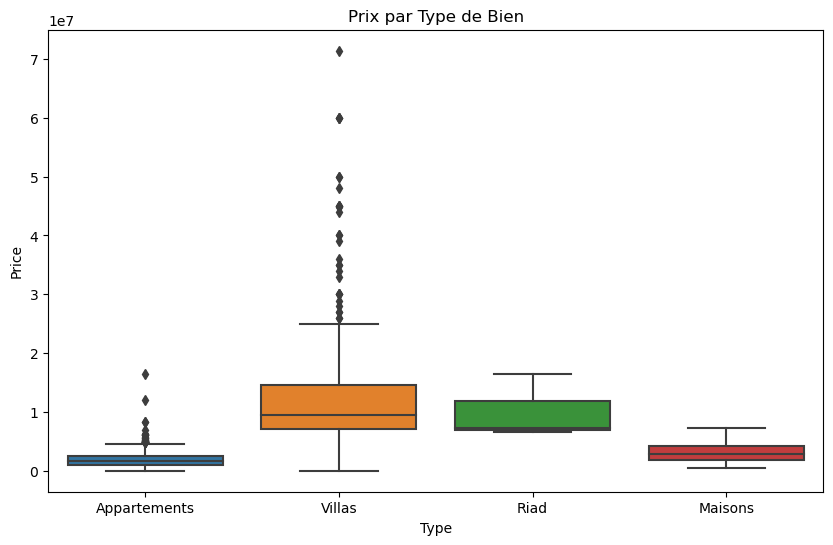

In [13]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Type', y='Price', data=df)
plt.title('Prix par Type de Bien')
plt.show()

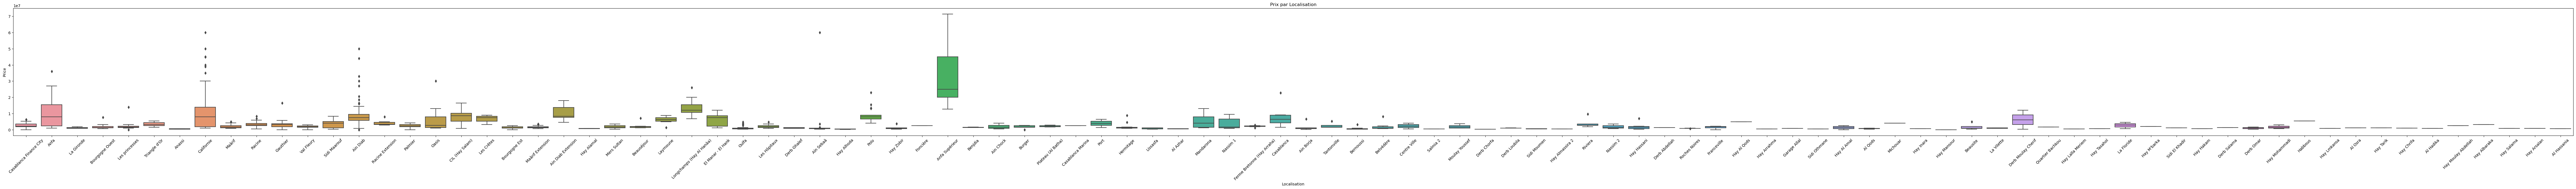

In [14]:
plt.figure(figsize=(120, 6))
sns.boxplot(x='Localisation', y='Price', data=df)
plt.xticks(rotation=45)
plt.title('Prix par Localisation')
plt.show()

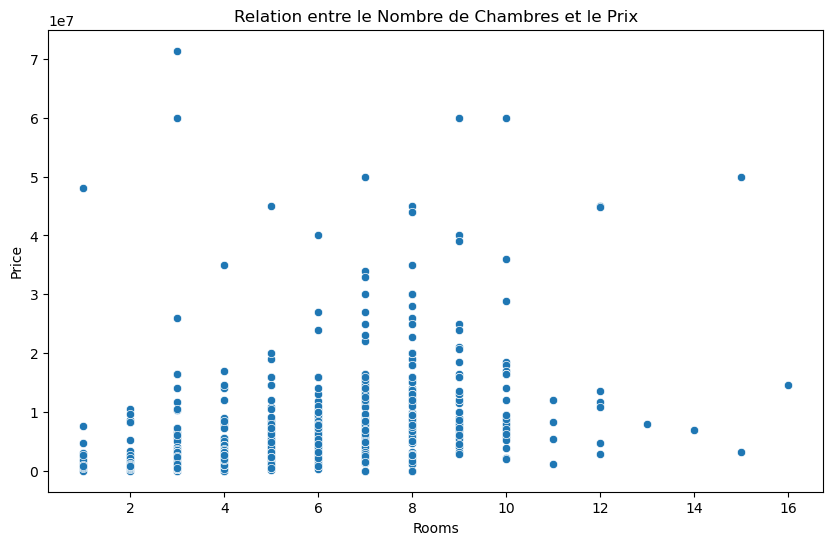

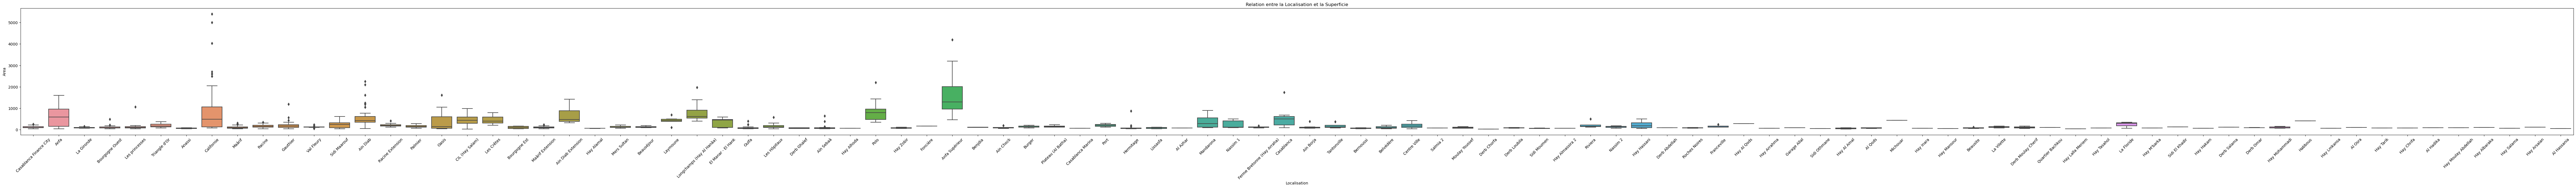

In [15]:
# Visualiser la relation entre le nombre de chambres et le prix
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Rooms', y='Price', data=df)
plt.title('Relation entre le Nombre de Chambres et le Prix')
plt.show()

# Visualiser la relation entre la localisation et la superficie
plt.figure(figsize=(120, 6))
sns.boxplot(x='Localisation', y='Area', data=df)
plt.xticks(rotation=45)
plt.title('Relation entre la Localisation et la Superficie')
plt.show()


In [16]:
print(df['Other_tags'].unique())

['[\'Nouveau\', "Moins d\'un an"]' "['Bon état', '10-20 ans']"
 "['Bon état', '5-10 ans']" "['Bon état']" "['Nouveau', '1-5 ans']"
 "['Nouveau']" "['À rénover', '30-50 ans']" "['Nouveau', '5-10 ans']"
 "['Bon état', '1-5 ans']" "['À rénover', '20-30 ans']"
 "['Bon état', '20-30 ans']" '[]' "['À rénover', '10-20 ans']"
 '[\'Bon état\', "Moins d\'un an"]' "['À rénover']"
 "['Nouveau', '10-20 ans']" "['À rénover', '5-10 ans']"
 "['Bon état', '30-50 ans']" "['Nouveau', '20-30 ans']"
 "['À rénover', '1-5 ans']" "['À rénover', '50-70 ans']"]


In [17]:
import re



def extract_etat(tags):
    if isinstance(tags, str):
        match = re.search(r"(Bon état|Nouveau|À rénover)", tags)
        if match:
            return match.group(0)
    return None

def extract_age(tags):
    if isinstance(tags, str):
        match = re.search(r"(\d+-\d+ ans|Moins d'un an|1-5 ans|20-30 ans|30-50 ans|50-70 ans)", tags)
        if match:
            return match.group(0)
    return None

df['État'] = df['Other_tags'].apply(extract_etat)
df['Age'] = df['Other_tags'].apply(extract_age)

df.drop(['Other_tags', 'Price_m2', 'Floor'], axis=1, inplace=True)



In [18]:
df.head()

,Type,Localisation,Price,Area,Rooms,Bedrooms,Bathrooms,État,Age
0,Appartements,Casablanca Finance City,22000,219.0,4.0,3.0,3.0,Nouveau,Moins d'un an
1,Appartements,Anfa,1230000,86.0,3.0,2.0,2.0,Bon état,10-20 ans
2,Appartements,La Gironde,900000,86.0,3.0,2.0,1.0,Bon état,10-20 ans
3,Appartements,Bourgogne Ouest,2400000,180.0,5.0,3.0,3.0,Bon état,10-20 ans
4,Appartements,Les princesses,1550000,120.0,5.0,3.0,2.0,Bon état,5-10 ans


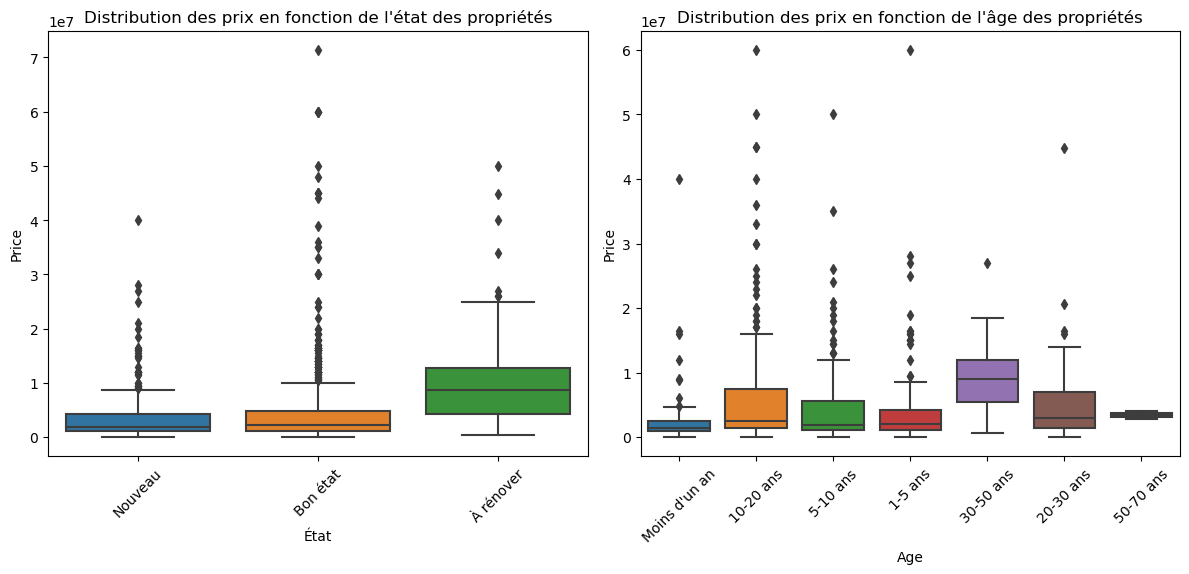

In [19]:


plt.figure(figsize=(12, 6))

# 1. Boxplot pour visualiser la relation entre 'État' et 'Price'
plt.subplot(1, 2, 1)
sns.boxplot(x='État', y='Price', data=df)
plt.title('Distribution des prix en fonction de l\'état des propriétés')
plt.xticks(rotation=45)  

# 2. Boxplot pour visualiser la relation entre 'Age' et 'Price'
plt.subplot(1, 2, 2)
sns.boxplot(x='Age', y='Price', data=df)
plt.title('Distribution des prix en fonction de l\'âge des propriétés')
plt.xticks(rotation=45)  

# Afficher les graphiques
plt.tight_layout()
plt.show()


In [20]:
df1=df.copy()


In [25]:
df1.head()

,Type,Localisation,Price,Area,Rooms,Bedrooms,Bathrooms,État,Age
0,Appartements,Casablanca Finance City,22000,219.0,4.0,3.0,3.0,Nouveau,Moins d'un an
1,Appartements,Anfa,1230000,86.0,3.0,2.0,2.0,Bon état,10-20 ans
2,Appartements,La Gironde,900000,86.0,3.0,2.0,1.0,Bon état,10-20 ans
3,Appartements,Bourgogne Ouest,2400000,180.0,5.0,3.0,3.0,Bon état,10-20 ans
4,Appartements,Les princesses,1550000,120.0,5.0,3.0,2.0,Bon état,5-10 ans


In [29]:
df1.dtypes

Type             object
Localisation     object
Price             int64
Area            float64
Rooms           float64
Bedrooms        float64
Bathrooms       float64
État             object
Age              object
dtype: object

In [31]:
from sklearn.preprocessing import LabelEncoder


label_encoder = LabelEncoder()

df1['État'] = label_encoder.fit_transform(df1['État'])
df1['Age'] = label_encoder.fit_transform(df1['Age'])
df1['Type'] = label_encoder.fit_transform(df1['Type'])
df1['Localisation'] = label_encoder.fit_transform(df1['Localisation'])


def handle_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])

for col in ['Price', 'Area', 'Rooms', 'Bedrooms', 'Bathrooms']:
    handle_outliers(df1, col)
    


In [32]:
df1.head()

,Type,Localisation,Price,Area,Rooms,Bedrooms,Bathrooms,État,Age
0,0,24,22000.0,219.0,4.0,3.0,3.0,1,6
1,0,10,1230000.0,86.0,3.0,2.0,2.0,0,1
2,0,65,900000.0,86.0,3.0,2.0,1.0,0,1
3,0,19,2400000.0,180.0,5.0,3.0,3.0,0,1
4,0,70,1550000.0,120.0,5.0,3.0,2.0,0,4


In [33]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


# 3. Sélectionner les caractéristiques (features) et la cible (target)
X = df1[['Area', 'Rooms', 'Bedrooms', 'Bathrooms', 'État', 'Age', 'Type', 'Localisation']]
y = df1['Price']

# 4. Diviser les données en ensemble d'entraînement et ensemble de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Création et ajustement du modèle de régression linéaire
model = LinearRegression()
model.fit(X_train, y_train)

# 6. Prédictions
y_pred = model.predict(X_test)

# 7. Évaluation des performances
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# 8. Affichage des résultats
print(f'Mean Squared Error (MSE): {mse}')
print(f'R² Score: {r2}')

Mean Squared Error (MSE): 1640299162000.3926
R² Score: 0.9074985002820287


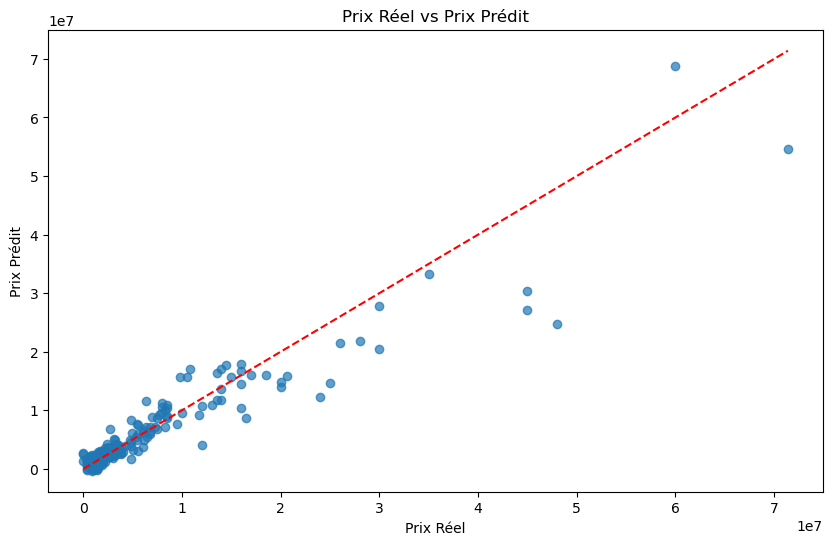

In [37]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Prix Réel')
plt.ylabel('Prix Prédit')
plt.title('Prix Réel vs Prix Prédit')
plt.show()
